In [5]:
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from helperFunctions import add_impulse_noise
from imfPython import imf
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

data_dir = 'test_images'

#set matplotlib size
plt.rcParams['figure.figsize'] = [8, 8]

In [21]:
# set image
image_name = 'lena_gray_512.tif'

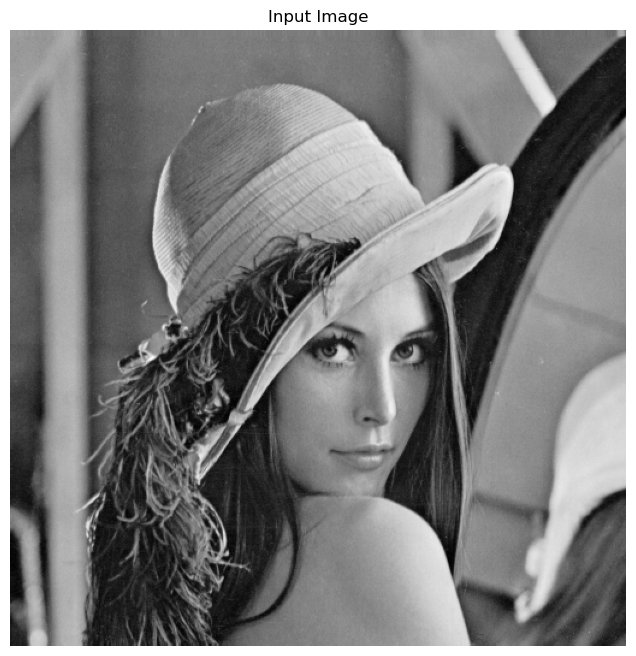

In [22]:
# load image
img_path = os.path.join(data_dir,image_name)
if not os.path.exists(img_path):
    raise FileExistsError

img = cv.imread(img_path,0)
plt.imshow(img,cmap='gray')
plt.axis('off')
plt.title("Input Image")
plt.show()

In [23]:
# add impulse noise from 10% to 90%
noisyImages = list()
for i in range(1,10):
    timg = np.copy(img)
    noisyImages.append(add_impulse_noise(timg,0.1*i))

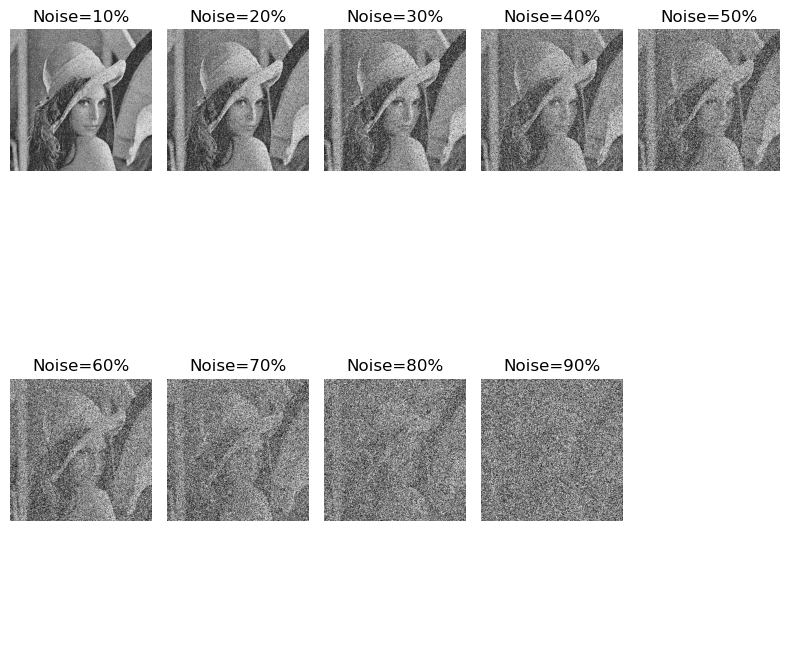

In [24]:
# plot the images in noisyImages as a 2x5 grid, noise_ratio starts from 0.1 to 0.9
fig, axs = plt.subplots(2,5)
ctr = 0
for i in range(2):
    for j in range(5):
        if ctr == 9:
            axs[i,j].axis('off')
            break
        axs[i,j].imshow(noisyImages[i*5+j],cmap='gray')
        axs[i,j].set_title('Noise={}%'.format(10*(i*5+j+1)))
        axs[i,j].axis('off')
        ctr+=1

plt.tight_layout()

In [25]:
filteredImages = list()
for i in range(9):
    filteredImages.append(imf(noisyImages[i]))


3351549.7678571427
0.0
6662992.361904763
0.0
10022094.367857145
1620.6575
0.0
13375168.377380958
10207.474801587301
0.0
16654775.49761905
70096.59603174604
0.0
19651626.197619054
352262.5274404761
553.309375
0.0
22058006.441666674
1342033.0802380953
3120.0132572751318
0.0
22235523.682142857
4349520.507519841
129015.12414351855
2880.00578042328
0.0
17090066.35
10529791.94299603
2256550.3831299604
208585.59727397482
10014.19097534171
695.4428628571429
0.0


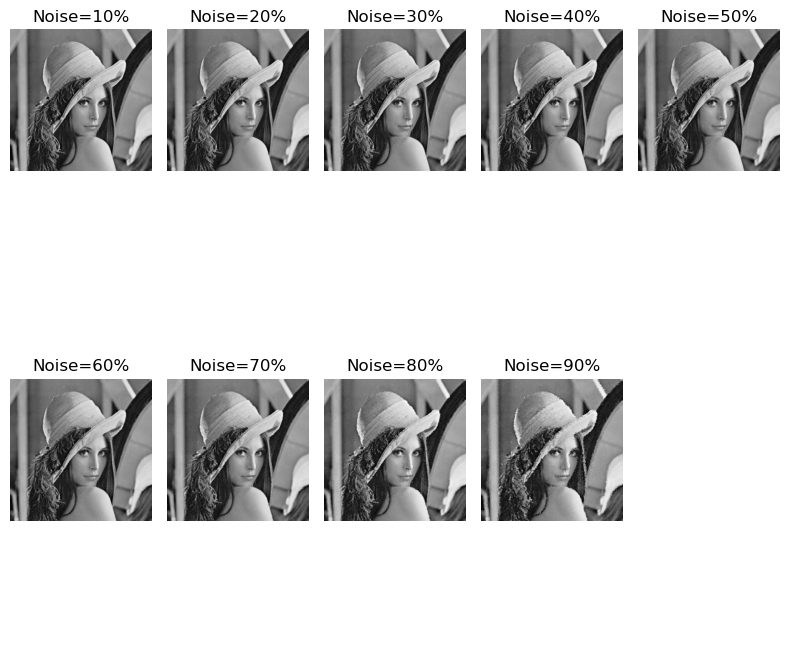

In [26]:
# plot filtered images
fig, axs = plt.subplots(2,5)
ctr = 0
for i in range(2):
    for j in range(5):
        if ctr == 9:
            axs[i,j].axis('off')
            break
        axs[i,j].imshow(filteredImages[i*5+j],cmap='gray')
        axs[i,j].set_title('Noise={}%'.format(10*(i*5+j+1)))
        axs[i,j].axis('off')
        ctr+=1
fig.tight_layout()

In [15]:
psnr_list = dict()
for i in range(9):
    psnr_list[f'{(i+1)*10}']=psnr(img,filteredImages[i])
    # psnr_list.append(psnr(img,filteredImages[i]))
df = pd.DataFrame(psnr_list, index = [1])
df

,10,20,30,40,50,60,70,80,90
1,42.355278,39.195219,37.076548,35.425109,33.773314,32.235722,30.531113,28.846744,26.192664


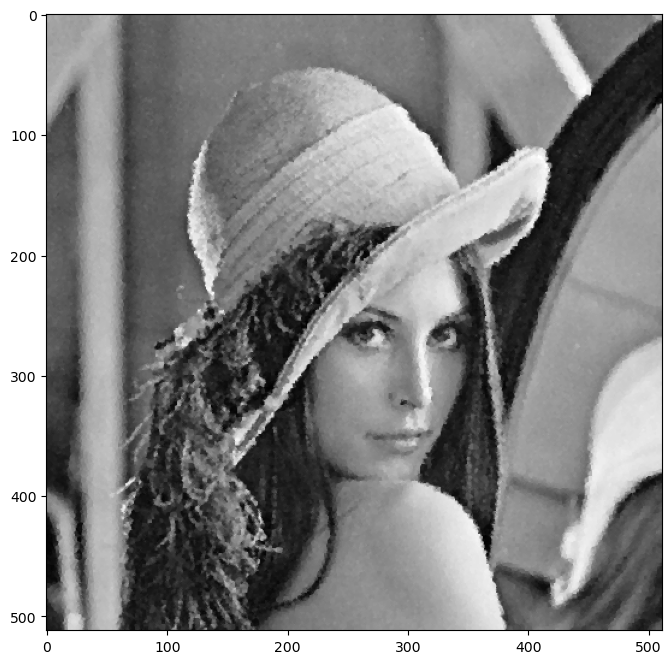

In [29]:
plt.imshow(filteredImages[7],cmap='gray')

In [27]:
i = 5
cv.imwrite('60_noise.png',noisyImages[i])
cv.imwrite('60_filtered.png',filteredImages[i])

True

testing for all images

In [2]:
# list all imagees in data_dir
images = os.listdir(data_dir)
img_paths = dict()
for i in images:
    img_paths[i] = os.path.join(data_dir,i)
print(img_paths)

{'cameraman.tif': 'test_images\\cameraman.tif', 'house.tif': 'test_images\\house.tif', 'jetplane.tif': 'test_images\\jetplane.tif', 'lake.tif': 'test_images\\lake.tif', 'lena_gray_512.tif': 'test_images\\lena_gray_512.tif', 'livingroom.tif': 'test_images\\livingroom.tif', 'mandril_gray.tif': 'test_images\\mandril_gray.tif', 'peppers_gray.tif': 'test_images\\peppers_gray.tif', 'pirate.tif': 'test_images\\pirate.tif', 'walkbridge.tif': 'test_images\\walkbridge.tif', 'woman_darkhair.tif': 'test_images\\woman_darkhair.tif'}


In [3]:
# add impulse noise from 10% to 90% to all images
noisyImages = dict()
for i in img_paths:
    img = cv.imread(img_paths[i],0)
    noisyImages[i] = list()
    for j in range(1,10):
        timg = np.copy(img)
        noisyImages[i].append(add_impulse_noise(timg,0.1*j))

In [ ]:
# filter all images using imf
import tqdm
filteredImages = dict()
for i in tqdm.tqdm(img_paths):
    filteredImages[i] = list()
    for j in range(9):
        filteredImages[i].append(imf(noisyImages[i][j]))

In [7]:
output_dir = 'output'
noisyDir = os.path.join(output_dir,'noisy')
filteredDir = os.path.join(output_dir,'filtered')
if not os.path.exists(output_dir):
    os.mkdir(output_dir)
if not os.path.exists(noisyDir):
    os.mkdir(noisyDir)
if not os.path.exists(filteredDir):
    os.mkdir(filteredDir)

# save noisy images in noisyDir in separate folders. folderName= image name
for i in noisyImages:
    folderName = i.split('.')[0]
    folderPath = os.path.join(noisyDir,folderName)
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    for j in range(9):
        cv.imwrite(os.path.join(folderPath,f'{j+1}.png'),noisyImages[i][j])

In [8]:
# save filtered images in filteredDir in separate folders. folderName= image name
for i in filteredImages:
    folderName = i.split('.')[0]
    folderPath = os.path.join(filteredDir,folderName)
    if not os.path.exists(folderPath):
        os.mkdir(folderPath)
    for j in range(9):
        cv.imwrite(os.path.join(folderPath,f'{j+1}.png'),filteredImages[i][j])

In [25]:
# compute psnr and structural similarity for all images
ssim_list = dict()
psnr_list = dict()
for i in filteredImages:
    psnr_list[i] = list()
    ssim_list[i] = list()
    for j in range(9):
        psnr_list[i].append(psnr(cv.imread(img_paths[i],0),filteredImages[i][j]))
        ssim_list[i].append(ssim(cv.imread(img_paths[i],0),filteredImages[i][j]))


In [62]:
#create a dataframe for psnr with index as image name and columns as noise ratio
df_psnr = pd.DataFrame(psnr_list)
df_psnr

,cameraman.tif,house.tif,jetplane.tif,lake.tif,lena_gray_512.tif,livingroom.tif,mandril_gray.tif,peppers_gray.tif,pirate.tif,walkbridge.tif,woman_darkhair.tif
0,43.654440,51.514774,41.902702,39.065334,42.595365,38.060851,38.502958,41.622419,39.545888,35.578634,49.139037
1,40.180677,47.543659,38.655324,35.745715,39.140418,34.976522,35.213672,38.419027,36.403350,32.348963,45.921378
2,37.840485,44.887727,36.511176,33.754231,37.014030,32.932760,33.054999,36.321689,34.361737,30.536340,43.562540
3,35.973911,42.411509,34.732736,32.002422,35.414762,31.425655,31.323096,34.725133,32.774946,28.894567,41.752483
4,34.288827,40.079198,32.938267,30.551550,33.774685,30.019998,29.738061,33.229600,31.238455,27.499933,40.161154
5,32.035694,37.813724,31.294459,29.038880,32.117902,28.603945,28.108951,31.749818,29.811387,26.165782,38.339740
6,30.578322,35.692338,29.481375,27.379204,30.596935,27.120218,26.382992,30.144069,28.348574,24.839680,36.596856
7,28.241819,33.254167,27.600911,25.618700,28.813086,25.483029,24.512831,28.698659,26.706549,23.338002,34.701566
8,25.214516,30.049878,24.726933,23.176694,26.248904,23.336639,22.038941,26.178728,24.458727,21.320912,31.696472


In [63]:
# change index range to 10-90
df_psnr.index = [10,20,30,40,50,60,70,80,90]

# add average column and compute average of all columns
df_psnr['Average'] = df_psnr.mean(axis=1)
df_psnr

,cameraman.tif,house.tif,jetplane.tif,lake.tif,lena_gray_512.tif,livingroom.tif,mandril_gray.tif,peppers_gray.tif,pirate.tif,walkbridge.tif,woman_darkhair.tif,Average
10,43.654440,51.514774,41.902702,39.065334,42.595365,38.060851,38.502958,41.622419,39.545888,35.578634,49.139037,41.925673
20,40.180677,47.543659,38.655324,35.745715,39.140418,34.976522,35.213672,38.419027,36.403350,32.348963,45.921378,38.595337
30,37.840485,44.887727,36.511176,33.754231,37.014030,32.932760,33.054999,36.321689,34.361737,30.536340,43.562540,36.434338
40,35.973911,42.411509,34.732736,32.002422,35.414762,31.425655,31.323096,34.725133,32.774946,28.894567,41.752483,34.675566
50,34.288827,40.079198,32.938267,30.551550,33.774685,30.019998,29.738061,33.229600,31.238455,27.499933,40.161154,33.047248
60,32.035694,37.813724,31.294459,29.038880,32.117902,28.603945,28.108951,31.749818,29.811387,26.165782,38.339740,31.370935
70,30.578322,35.692338,29.481375,27.379204,30.596935,27.120218,26.382992,30.144069,28.348574,24.839680,36.596856,29.741869
80,28.241819,33.254167,27.600911,25.618700,28.813086,25.483029,24.512831,28.698659,26.706549,23.338002,34.701566,27.906302
90,25.214516,30.049878,24.726933,23.176694,26.248904,23.336639,22.038941,26.178728,24.458727,21.320912,31.696472,25.313395


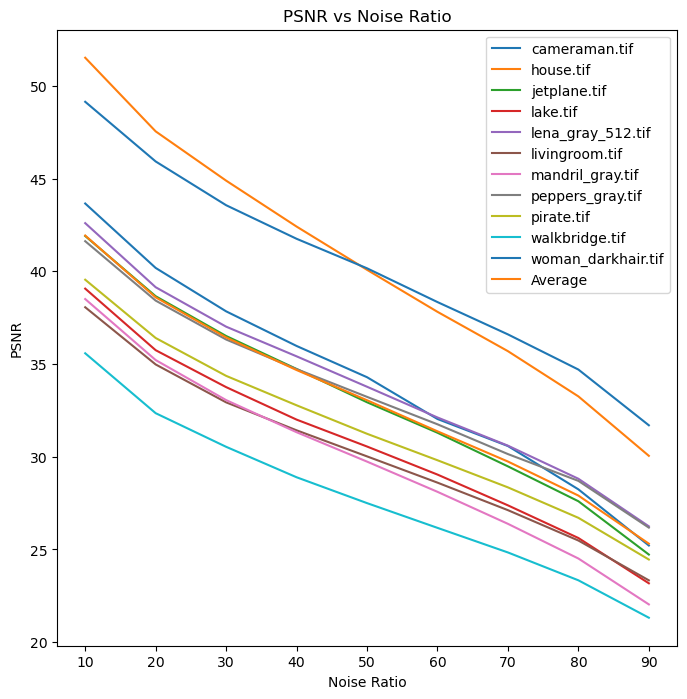

In [64]:
# PLOT psnr for all the images in df_psnr as multiple line plots in a single plot
df_psnr.plot.line()
plt.xlabel('Noise Ratio')
plt.ylabel('PSNR')
plt.title('PSNR vs Noise Ratio')
plt.savefig('psnr.png')
plt.show()






In [67]:
#create a dataframe for ssim with index as image name and columns as noise ratio
df_ssim = pd.DataFrame(ssim_list)
# change index range to 10-90
df_ssim.index = [10,20,30,40,50,60,70,80,90]
df_ssim


,cameraman.tif,house.tif,jetplane.tif,lake.tif,lena_gray_512.tif,livingroom.tif,mandril_gray.tif,peppers_gray.tif,pirate.tif,walkbridge.tif,woman_darkhair.tif
10,0.996278,0.998395,0.994055,0.987629,0.991041,0.984172,0.991065,0.984566,0.987648,0.981447,0.995673
20,0.992155,0.996376,0.987673,0.973574,0.980472,0.967589,0.980673,0.967625,0.974393,0.961122,0.990986
30,0.987163,0.994009,0.980186,0.958096,0.969338,0.948403,0.967955,0.948821,0.959673,0.939184,0.985691
40,0.980919,0.990457,0.971461,0.940390,0.956152,0.926473,0.951461,0.928001,0.941334,0.911144,0.979407
50,0.972254,0.985316,0.959157,0.917773,0.939922,0.899586,0.929839,0.903420,0.918815,0.877546,0.971458
60,0.959420,0.977815,0.943189,0.889769,0.918606,0.865741,0.898673,0.872330,0.889908,0.835531,0.960962
70,0.942075,0.965884,0.920308,0.852502,0.891271,0.819586,0.851585,0.836012,0.851142,0.780691,0.946327
80,0.911300,0.944755,0.884938,0.799735,0.851626,0.754623,0.776075,0.790746,0.795454,0.703673,0.924641
90,0.844183,0.896039,0.813326,0.703712,0.780721,0.642750,0.623993,0.719075,0.698518,0.566821,0.879976


In [68]:
# add average column and compute average of all columns
df_ssim['Average'] = df_ssim.mean(axis=1)
df_ssim

,cameraman.tif,house.tif,jetplane.tif,lake.tif,lena_gray_512.tif,livingroom.tif,mandril_gray.tif,peppers_gray.tif,pirate.tif,walkbridge.tif,woman_darkhair.tif,Average
10,0.996278,0.998395,0.994055,0.987629,0.991041,0.984172,0.991065,0.984566,0.987648,0.981447,0.995673,0.990179
20,0.992155,0.996376,0.987673,0.973574,0.980472,0.967589,0.980673,0.967625,0.974393,0.961122,0.990986,0.979331
30,0.987163,0.994009,0.980186,0.958096,0.969338,0.948403,0.967955,0.948821,0.959673,0.939184,0.985691,0.967138
40,0.980919,0.990457,0.971461,0.940390,0.956152,0.926473,0.951461,0.928001,0.941334,0.911144,0.979407,0.952473
50,0.972254,0.985316,0.959157,0.917773,0.939922,0.899586,0.929839,0.903420,0.918815,0.877546,0.971458,0.934099
60,0.959420,0.977815,0.943189,0.889769,0.918606,0.865741,0.898673,0.872330,0.889908,0.835531,0.960962,0.910177
70,0.942075,0.965884,0.920308,0.852502,0.891271,0.819586,0.851585,0.836012,0.851142,0.780691,0.946327,0.877944
80,0.911300,0.944755,0.884938,0.799735,0.851626,0.754623,0.776075,0.790746,0.795454,0.703673,0.924641,0.830688
90,0.844183,0.896039,0.813326,0.703712,0.780721,0.642750,0.623993,0.719075,0.698518,0.566821,0.879976,0.742647


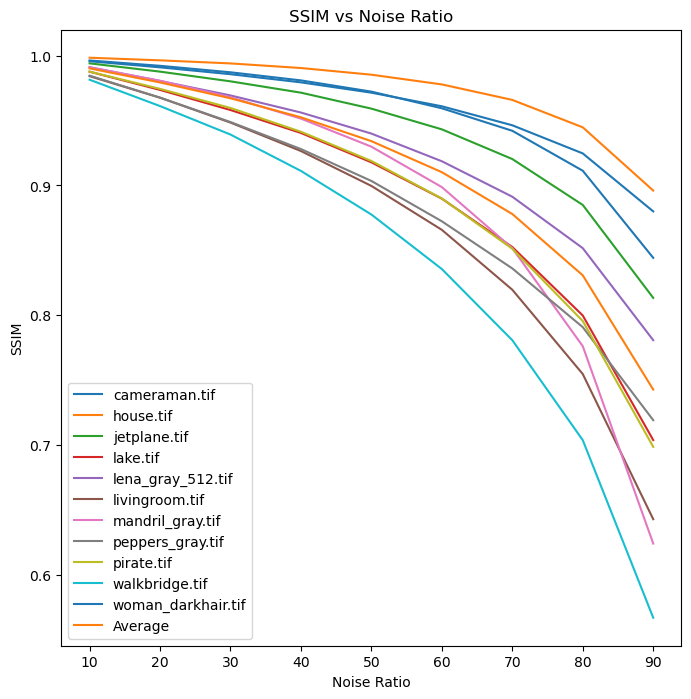

In [69]:
# PLOT ssim for all the images in df_ssim as multiple line plots in a single plot
df_ssim.plot.line()
plt.xlabel('Noise Ratio')
plt.ylabel('SSIM')
plt.title('SSIM vs Noise Ratio')
plt.savefig('ssim.png')
plt.show()


In [39]:
# TRANSPOSE THE DATAFRAME
df_psnr = df_psnr.T
df_psnr

,10,20,30,40,50,60,70,80,90
cameraman.tif,43.654440,40.180677,37.840485,35.973911,34.288827,32.035694,30.578322,28.241819,25.214516
house.tif,51.514774,47.543659,44.887727,42.411509,40.079198,37.813724,35.692338,33.254167,30.049878
jetplane.tif,41.902702,38.655324,36.511176,34.732736,32.938267,31.294459,29.481375,27.600911,24.726933
lake.tif,39.065334,35.745715,33.754231,32.002422,30.551550,29.038880,27.379204,25.618700,23.176694
lena_gray_512.tif,42.595365,39.140418,37.014030,35.414762,33.774685,32.117902,30.596935,28.813086,26.248904
livingroom.tif,38.060851,34.976522,32.932760,31.425655,30.019998,28.603945,27.120218,25.483029,23.336639
mandril_gray.tif,38.502958,35.213672,33.054999,31.323096,29.738061,28.108951,26.382992,24.512831,22.038941
peppers_gray.tif,41.622419,38.419027,36.321689,34.725133,33.229600,31.749818,30.144069,28.698659,26.178728
pirate.tif,39.545888,36.403350,34.361737,32.774946,31.238455,29.811387,28.348574,26.706549,24.458727
walkbridge.tif,35.578634,32.348963,30.536340,28.894567,27.499933,26.165782,24.839680,23.338002,21.320912


In [40]:
# RENAME THE COLUMNS
df_psnr.columns = [f'{i+1}0% noise' for i in range(9)]
df_psnr

,10% noise,20% noise,30% noise,40% noise,50% noise,60% noise,70% noise,80% noise,90% noise
cameraman.tif,43.654440,40.180677,37.840485,35.973911,34.288827,32.035694,30.578322,28.241819,25.214516
house.tif,51.514774,47.543659,44.887727,42.411509,40.079198,37.813724,35.692338,33.254167,30.049878
jetplane.tif,41.902702,38.655324,36.511176,34.732736,32.938267,31.294459,29.481375,27.600911,24.726933
lake.tif,39.065334,35.745715,33.754231,32.002422,30.551550,29.038880,27.379204,25.618700,23.176694
lena_gray_512.tif,42.595365,39.140418,37.014030,35.414762,33.774685,32.117902,30.596935,28.813086,26.248904
livingroom.tif,38.060851,34.976522,32.932760,31.425655,30.019998,28.603945,27.120218,25.483029,23.336639
mandril_gray.tif,38.502958,35.213672,33.054999,31.323096,29.738061,28.108951,26.382992,24.512831,22.038941
peppers_gray.tif,41.622419,38.419027,36.321689,34.725133,33.229600,31.749818,30.144069,28.698659,26.178728
pirate.tif,39.545888,36.403350,34.361737,32.774946,31.238455,29.811387,28.348574,26.706549,24.458727
walkbridge.tif,35.578634,32.348963,30.536340,28.894567,27.499933,26.165782,24.839680,23.338002,21.320912


In [41]:
# RENAME THE INDEX
df_psnr.index.name = 'Image Name'
# compute average of colums and append to df_psnr
df_psnr.loc['Average'] = df_psnr.mean()
df_psnr

,10% noise,20% noise,30% noise,40% noise,50% noise,60% noise,70% noise,80% noise,90% noise
Image Name,,,,,,,,,
cameraman.tif,43.654440,40.180677,37.840485,35.973911,34.288827,32.035694,30.578322,28.241819,25.214516
house.tif,51.514774,47.543659,44.887727,42.411509,40.079198,37.813724,35.692338,33.254167,30.049878
jetplane.tif,41.902702,38.655324,36.511176,34.732736,32.938267,31.294459,29.481375,27.600911,24.726933
lake.tif,39.065334,35.745715,33.754231,32.002422,30.551550,29.038880,27.379204,25.618700,23.176694
lena_gray_512.tif,42.595365,39.140418,37.014030,35.414762,33.774685,32.117902,30.596935,28.813086,26.248904
livingroom.tif,38.060851,34.976522,32.932760,31.425655,30.019998,28.603945,27.120218,25.483029,23.336639
mandril_gray.tif,38.502958,35.213672,33.054999,31.323096,29.738061,28.108951,26.382992,24.512831,22.038941
peppers_gray.tif,41.622419,38.419027,36.321689,34.725133,33.229600,31.749818,30.144069,28.698659,26.178728
pirate.tif,39.545888,36.403350,34.361737,32.774946,31.238455,29.811387,28.348574,26.706549,24.458727


In [42]:
# TRANSPOSE THE DATAFRAME
df_ssim = df_ssim.T
# rename the columns
df_ssim.columns = [f'{i+1}0% noise' for i in range(9)]
# rename the index
df_ssim.index.name = 'Image Name'
# compute average of colums and append to df_ssim
df_ssim.loc['Average'] = df_ssim.mean()
df_ssim

,10% noise,20% noise,30% noise,40% noise,50% noise,60% noise,70% noise,80% noise,90% noise
Image Name,,,,,,,,,
cameraman.tif,0.996278,0.992155,0.987163,0.980919,0.972254,0.959420,0.942075,0.911300,0.844183
house.tif,0.998395,0.996376,0.994009,0.990457,0.985316,0.977815,0.965884,0.944755,0.896039
jetplane.tif,0.994055,0.987673,0.980186,0.971461,0.959157,0.943189,0.920308,0.884938,0.813326
lake.tif,0.987629,0.973574,0.958096,0.940390,0.917773,0.889769,0.852502,0.799735,0.703712
lena_gray_512.tif,0.991041,0.980472,0.969338,0.956152,0.939922,0.918606,0.891271,0.851626,0.780721
livingroom.tif,0.984172,0.967589,0.948403,0.926473,0.899586,0.865741,0.819586,0.754623,0.642750
mandril_gray.tif,0.991065,0.980673,0.967955,0.951461,0.929839,0.898673,0.851585,0.776075,0.623993
peppers_gray.tif,0.984566,0.967625,0.948821,0.928001,0.903420,0.872330,0.836012,0.790746,0.719075
pirate.tif,0.987648,0.974393,0.959673,0.941334,0.918815,0.889908,0.851142,0.795454,0.698518


In [43]:
# SAVE THE DATAFRAMES   AS CSV FILES
df_psnr.to_csv('psnr.csv')
df_ssim.to_csv('ssim.csv')